In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
with open('../data/dataset_0.json') as f:
    data = json.load(f)

# Load screen details
with open('../data/screen_details_0.json') as f:
    screen_details = json.load(f)

# Convert to a more usable format
records = []
for grid_size, points in data.items():
    if grid_size in ['3x3', '5x5']:
        for point_data in points:
            if point_data['landmarks']:
                records.append({
                    'grid_size': grid_size,
                    'point_x': point_data['point'][0],
                    'point_y': point_data['point'][1],
                    'distance': point_data['distance'],
                    'landmarks': np.array([list(landmark.values()) for landmark in point_data['landmarks']]).flatten()
                })

df = pd.DataFrame(records)
print(df.head())
print(df.info())
print(df.describe())


  grid_size  point_x  point_y   distance  \
0       3x3      0.2      0.2  68.307231   
1       3x3      0.2      0.2  66.560030   
2       3x3      0.2      0.2  66.028765   
3       3x3      0.2      0.2  65.917804   
4       3x3      0.2      0.2  65.726675   

                                           landmarks  
0  [0.4910184442996979, 0.46838852763175964, -0.0...  
1  [0.4832013249397278, 0.47302475571632385, -0.0...  
2  [0.48055458068847656, 0.469745397567749, -0.01...  
3  [0.4789550304412842, 0.4660942852497101, -0.01...  
4  [0.47973740100860596, 0.4611249566078186, -0.0...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   grid_size  1700 non-null   object 
 1   point_x    1700 non-null   float64
 2   point_y    1700 non-null   float64
 3   distance   1700 non-null   float64
 4   landmarks  1700 non-null   object 
dtypes: float64(3),

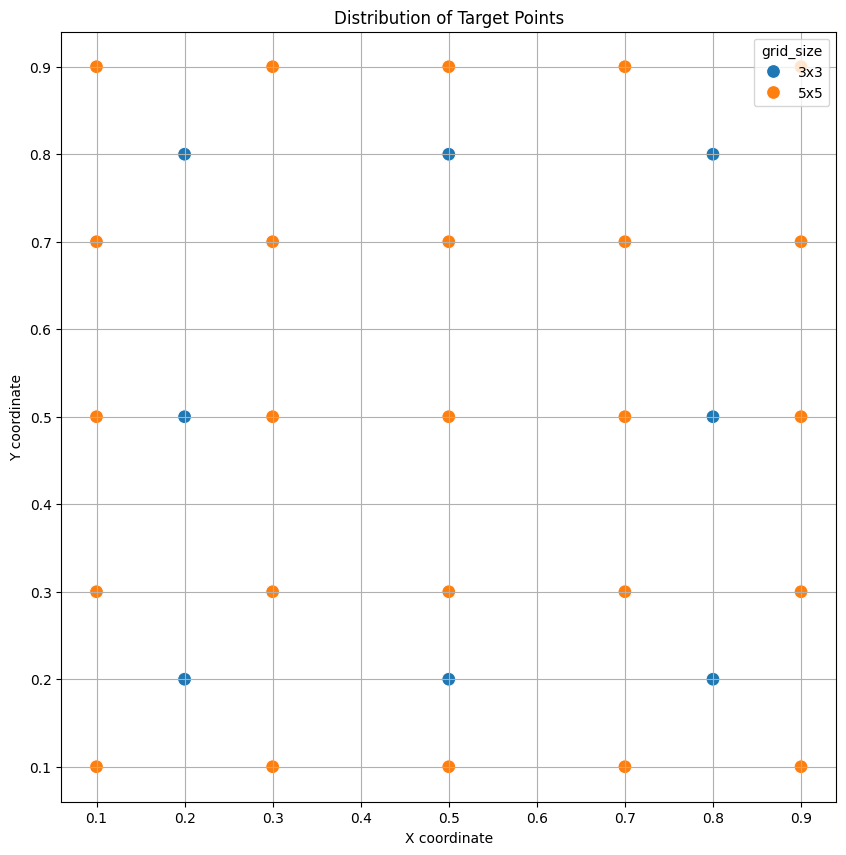

In [4]:
# Plot the distribution of target points
plt.figure(figsize=(10, 10))
sns.scatterplot(x='point_x', y='point_y', hue='grid_size', data=df, s=100)
plt.title('Distribution of Target Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(True)
plt.show()

count    1700.0
mean     1434.0
std         0.0
min      1434.0
25%      1434.0
50%      1434.0
75%      1434.0
max      1434.0
Name: num_landmarks, dtype: float64


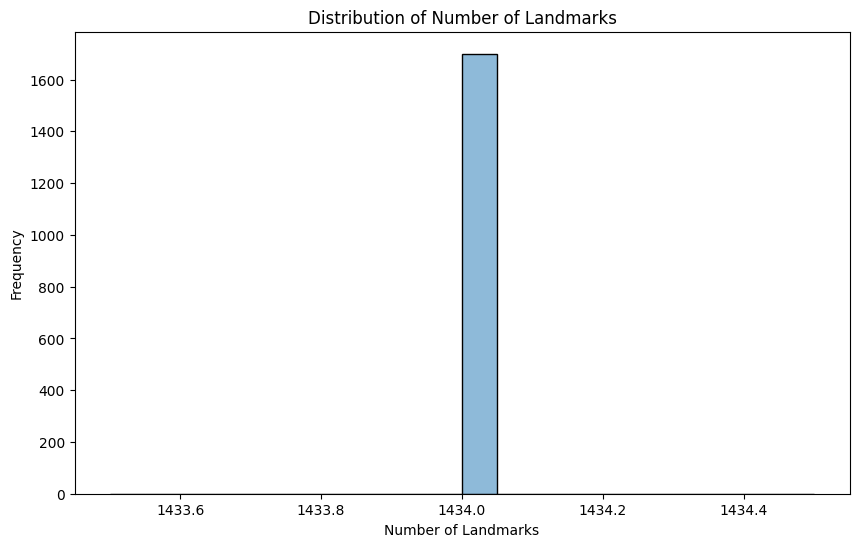

In [ ]:
# Analyze the number of landmarks - check for data incosistencies
df['num_landmarks'] = df['landmarks'].apply(lambda x: len(x))
print(df['num_landmarks'].describe())


